In [1]:
using Plots, LaTeXStrings, DualNumbers
pyplot()

Plots.PyPlotBackend()

In [2]:
"""
    ciclosestables!(xx, f, nit, nout, cc)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0,cc)` tenga sentido. La idea es los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`. 
"""
function ciclosestables!(xx, f, nit, nout, cc)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
    x0 = 0.0
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    return nothing
end

"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diagbifurc(f, nit, nout, crange)
    xx = Vector{Float64}(nout)
    #Lo voy a guardar en un array.
    ff = Array{Float64,2}(nout, length(crange))
    #ff = Any[]
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c)
        
        #push!(ff, xx)
        
        ff[:,ic] = xx
        
    end
    
    return ff
end

diagbifurc (generic function with 1 method)

In [3]:
function bifurcation_function(x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range_r
        
        solution = [x0]
        #steps = Int[0]
        x_old = x0
        
        for j in 1:n
            
            x_new = x_old^2 + r
            x_old = x_new
            
        end
        
        for i in 1:k

            x_new = x_old^2 + r
            push!(solution, x_new)
            #push!(steps, i)
            x_old = x_new

        end
            
        #deleteat!(solution, 1:k) #Remove the transient.
        rs = similar(solution)
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        append!(orbit, solution)
        append!(r_par, rs)
        
    end
    
    return r_par, orbit
    
end

bifurcation_function (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



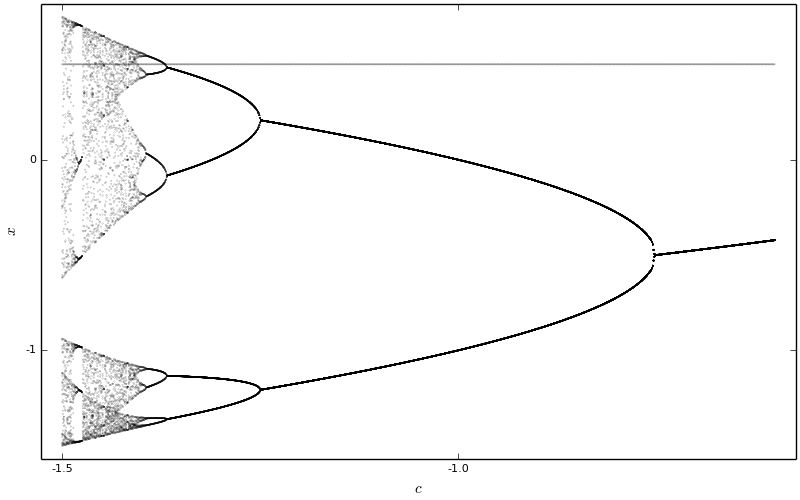

In [4]:
c_parametro, orbita = bifurcation_function(0.5, 1000, -1.5:1e-3:-0.6, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=false, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))

In [5]:
function iterator(f::Function, n::Int, k, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [176]:
function itera_funcion_anonym(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
end 

function itera_funcion_anonym_p(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    ex_ret
end 

itera_funcion_anonym_p (generic function with 1 method)

In [7]:
itera_funcion_anonym(2)

(anonymous function)

In [8]:
nombre(n::Int) = symbol( string("F_", n) )


nombre (generic function with 1 method)

In [9]:
"""
    compute_roots_paso(f::Function, x0, c)
"""
function compute_roots_paso(f::Function, x0, c)
            
            xi = Dual(x0, 1)

            # 1000 iterations of Newton's method
    for i in 1:1000

        x_2 = realpart(xi) - (realpart(f(xi, c)) - realpart(xi)) / (dualpart(f(xi, c)) - 1)
        xi = Dual(x_2, 1)
    end

    realpart(xi)
end

compute_roots_paso (generic function with 1 method)

In [10]:
f(x, c) = x^2 + c

f (generic function with 1 method)

In [12]:
for i in 1:16
    eval(itera_funcion_anonym(i))
end

## c = -0.5 n = 0

In [23]:
x_1 = iterator(f, 1000, 1, 0.0, -0.5)

1-element Array{Float64,1}:
 -0.366025

In [25]:
x_1 = compute_roots_paso(itera_funcion_anonym(1), x_1[1], -0.5)

-0.36602540378443865

In [27]:
x_1_e = itera_funcion_anonym(1)(x_1, -0.5)

-0.36602540378443865

In [28]:
abs(x_1 - x_1_e)

0.0

## c = -0.77, n = 2

In [229]:
# donde quiebra
x_1_p = iterator(f, 10000, 1, 0.0, -0.75)

1-element Array{Float64,1}:
 -0.492909

In [230]:
x_1_p = compute_roots_paso(itera_funcion_anonym(1), x_1_p[1], -0.75)

-0.5

In [227]:
x_1_q = itera_funcion_anonym(1)(x_1_p, -0.75)

-0.5

In [228]:
abs(x_1_p - x_1_q)

0.0

## c = -1.0, n = 2

In [134]:
x_2 = iterator(f, 10000, 1, 0.0, -1.1)

1-element Array{Float64,1}:
 0.091608

In [34]:
compute_roots_paso(itera_funcion_anonym(2), x_2[1], -1.1)

0.0916079783099617

In [35]:
x_2 = compute_roots_paso(itera_funcion_anonym(2), x_2[1], -1.1)

0.0916079783099617

In [135]:
x_2_p = itera_funcion_anonym(2)(x_2[1], -1.1)

0.0916079783099617

In [136]:
abs(x_2_p - x_2)

1-element Array{Float64,1}:
 0.0

## c = -1.3, n = 4

In [141]:
x_3 = iterator(f, 10000, 1, 0.0, -1.37)

1-element Array{Float64,1}:
 -0.0526152

In [59]:
x_3 = compute_roots_paso(itera_funcion_anonym(2^2), x_3[1], -1.38)

-0.09824931714504113

In [142]:
abs(itera_funcion_anonym(2^2)(x_3[1], -1.37) - x_3)

1-element Array{Float64,1}:
 0.0614675

## c = -1.38, n = 8

In [143]:
x_4 = iterator(f, 1000, 1, 0.0, -1.38)

1-element Array{Float64,1}:
 -0.00505829

In [63]:
x_4 = compute_roots_paso(itera_funcion_anonym(8), x_4[1], -1.38)

-0.005058291015618721

In [144]:
abs(itera_funcion_anonym(8)(x_4[1], -1.38) - x_4)

1-element Array{Float64,1}:
 0.0

In [157]:
function find_bifurcation(FF, CC)
    
    bifurcaciones = Any[]
    #eval(itera_funcion(1))
    n = 0
    
    for i in 1:length(FF)
        
        #Q_n = eval(itera_funcion(n))
        
        #x_i = compute_roots_paso(itera_funcion_anonym(2^n), FF[i], CC[i])
        x_i = FF[i]
        x_e = itera_funcion_anonym(2^n)(x_i, CC[i])
            
        if abs(x_i - x_e) > 1e-8
            
            n += 1
            push!(bifurcaciones, [CC[i], i])
            
        end
        
    end
    
    bifurcaciones
    
end     

find_bifurcation (generic function with 1 method)

In [185]:
crange = 0.25:-0.001:-1.4

ff = diagbifurc(itera_funcion_anonym(1), 10000, 1, crange); 
cc = ones(size(ff)[1])*crange';

In [186]:
ff

1x1651 Array{Float64,2}:
 0.4999  0.468377  0.455279  0.445228  …  -1.39797  -1.39889  -1.39946

In [188]:
a = find_bifurcation(ff, cc)

5-element Array{Any,1}:
 [-0.749,1000.0]
 [-0.75,1001.0] 
 [-1.25,1501.0] 
 [-1.368,1619.0]
 [-1.394,1645.0]

In [190]:
a[5][1]

-1.394